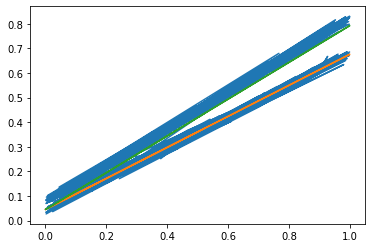

In [67]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 15 14:46:56 2022

@author: Saicharan
"""
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

def search(x,y,a1,b1,a2,b2):
    
    l = 360
    r = 1080
    
    while l < r:
        mid = l + (r-l)//2
        
        eLeft = np.sum((y[:mid] - a1*x[:mid] - b1 - np.random.normal(0, 0.01, size=len(x[:mid])))**2)
        eRight = np.sum((y[mid+1:] - a2*x[mid+1:] - b2 - np.random.normal(0, 0.01, size=len(x[mid+1:])))**2)
        
        if eLeft > eRight:
            l = mid+1
        else:
            r = mid-1
            
    return l

def regime_change(file_name):
    
    #Load x, y from data file
    x,y = np.loadtxt(file_name, unpack=True)
    x_data=np.array(x[:360]).reshape(-1,1)
    y_data=np.array(y[:360]).reshape(-1,1)

    reg = LinearRegression().fit(x_data, y_data)
    coeff1= reg.coef_
    intercept1 =reg.intercept_

    
    x_data1=np.array(x[-360:]).reshape(-1,1)
    y_data1=np.array(y[-360:]).reshape(-1,1)

    reg = LinearRegression().fit(x_data1, y_data1)
    coeff2= reg.coef_
    intercept2 =reg.intercept_
    a1=coeff1[0][0]
    a2=coeff2[0][0]
    b1=intercept1[0]
    b2=intercept1[0]
    #Find xc, yc
    
    
    xc = (b2 - b1)/(a2 - a1)
    yc = a1*xc + b1
    
    change_minute = np.abs(x - xc).argmin()
    
    plt.figure()
    plt.plot(x,y)
    plt.plot(x, a1*x + b1)
    plt.plot(x, a2*x + b2)
    plt.show()
    
    return change_minute, xc, yc


# if __name__ == '__main__':
c, xc, yc = regime_change('./examples/xy-0.01-1.dat')

In [49]:
print(c)

117


In [75]:

filename_dummy = './examples/xy-0.5-'
for j in range(4):
    x,y = np.loadtxt(filename_dummy+str(j)+'.dat', unpack=True)
    
    x_data=np.array(x[:360]).reshape(-1,1)
    y_data=np.array(y[:360]).reshape(-1,1)
    reg = LinearRegression().fit(x_data, y_data)
    coeff1= reg.coef_
    intercept1 =reg.intercept_


    x_data1=np.array(x[-360:]).reshape(-1,1)
    y_data1=np.array(y[-360:]).reshape(-1,1)

    reg = LinearRegression().fit(x_data1, y_data1)
    coeff2= reg.coef_
    intercept2 =reg.intercept_
    a1=coeff1[0][0]
    a2=coeff2[0][0]
    b1=intercept1[0]
    b2=intercept1[0]

    from sklearn.metrics import mean_squared_error as mse
    minV = float('inf')
    errVal = []
    minIndex = -1;
    for i in range(361,1080):
        left_data = x[:i]
        right_data = x[i+1:]
        leftfit = a1*left_data+b1;
        rightfit = a2*right_data+b2;
        error = mse(y[:i],leftfit)+ mse(y[i+1:],rightfit)
        errVal.append(error)
        if error < minV:
            minV = error
            minIndex = i

    print(j,minIndex)


0 1035
1 738
2 979
3 1079


0 1035
1 738
2 1016
3 1070


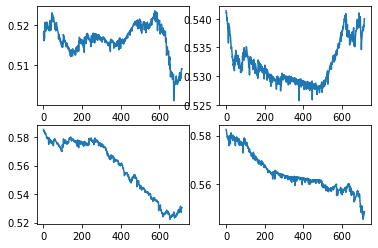

In [82]:
import matplotlib.pyplot as plt

plt.figure()
filename_dummy = './examples/xy-0.5-'
for j in range(4):
    x,y = np.loadtxt(filename_dummy+str(j)+'.dat', unpack=True)
    name = filename_dummy+str(j)+'.dat';
    listName = name.split('-')
    stddev = float(listName[1])    
    x_data=np.array(x[:360]).reshape(-1,1)
    y_data=np.array(y[:360]).reshape(-1,1)
    clf1 = Ridge(alpha=360*stddev*stddev)
    clf1.fit(x_data, y_data)

    x_data1=np.array(x[-360:]).reshape(-1,1)
    y_data1=np.array(y[-360:]).reshape(-1,1)

    clf2 = Ridge(alpha=360*stddev*stddev)
    clf2.fit(x_data1, y_data1)
    
    
    from sklearn.metrics import mean_squared_error as mse
    minV = float('inf')
    errVal = []
    minIndex = -1;
    for i in range(361,1078):
        left_data = x[:i].reshape(-1,1)
        right_data = x[i+1:].reshape(-1,1)
        leftfit = clf1.predict(left_data)
        rightfit = clf2.predict(right_data)
        error = mse(y[:i],leftfit)+ mse(y[i+1:],rightfit)
        errVal.append(error)
        if error < minV:
            minV = error
            minIndex = i
    
    print(j,minIndex)
    plt.subplot(2,2,j+1)
    plt.plot(errVal)
        
    

In [63]:
minIndex

671